# Well-Known Discrete Distributions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, hypergeom, nbinom, poisson

Often, the observations generated by different statistical experiments have the *same general type of behavior*. Consequently, random
variables associated with these experiments can be *described by essentially the same probability distribution* and therefore can be represented by a single formula. In fact, one needs only a handful of important probability distributions to describe
many of the random variables encountered in practice. **Such a handful of distributions describe several real-life random phenomena**.

In this chapter, we will explore some of those distribution that are **discrete**. Those that are continuous will be discuss in the next chapter.

<div style="widht:100%; height:20px; background-color:darkorchid;"></div>

## Discrete Uniform Distribution

> If the random variable $X$ with possible values $x_1, x_2, \ldots, x_n$ *assumes each value with equal probability* (earlier we called this kind of experiment a **equally likely outcomes experiment**), then the probability distribution of $X$ is a **uniform distribution** given by
> $$ P(X=x) = f(x;\ n) = \frac{1}{n} \quad\text{for } x \in \set{x_1, x_2, \ldots, x_n}. $$

<span style="color: green;"><b><u>Example</u></b></span> Let $X$ represent the number of the top face when tossing a fair die. Since each of the 66 outcomes are equally likely to occur, then $X$ has a uniform distribution given by

$$
f(x;\ n=6) = \frac{1}{6} \quad\text{for } x \in \set{1,2,3,4,5,6} 
$$

The probability histogram of a uniform distribution shows that the probability of each outcome is the same as indicated by the bars with equal height.

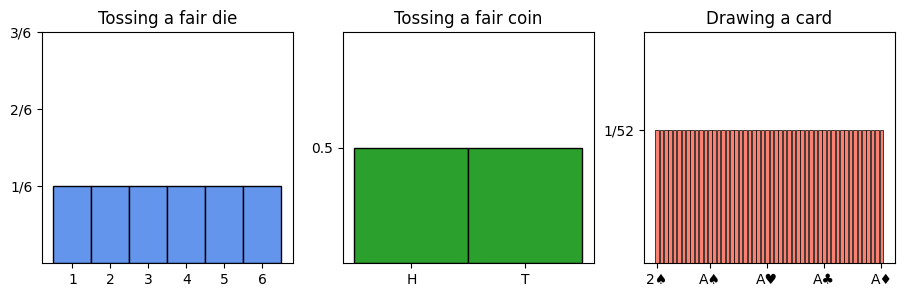

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(11,3))

axs[0].bar(np.arange(1,7), [1/6 for _ in range(6)], width=1, edgecolor='k', color='cornflowerblue')
axs[0].set(
    xticks=np.arange(1,7),
    ylim=[0,0.5], yticks=[1/6, 2/6, 3/6], yticklabels=['1/6','2/6','3/6'],
    title="Tossing a fair die"
)

axs[1].bar([1,2], [1/2, 1/2], width=1, edgecolor='k', color='tab:green')
axs[1].set(
    xticks=[1,2], xticklabels=['H','T'],
    ylim=[0,1], yticks=[0.5],
    title="Tossing a fair coin"
)

axs[2].bar(np.arange(1,53), np.arange(1,53) * 0 + 1/52, edgecolor='k', linewidth=0.5, color='salmon')
axs[2].set(
    xticks=[1,13,26,39,52], xticklabels=['2♠', 'A♠', 'A♥', 'A♣', 'A♦'],
    ylim=[0,1/30], yticks=[1/52], yticklabels=['1/52'],
    title="Drawing a card"
);

---
<h3 style="color: green; font-size: 16pt;">Expected Value & Variance of Discrete Uniform Distribution</h3>

Consider a uniformly distributed discrete random variable $X$ with pmf $f(x; n)$, so the expected value or the mean of $X$, is

$$
\mu = E[X] = \sum_{i=1}^n x_if(x_i;\ n) = \frac{1}{n}\sum_{i=1}^n x_i
$$

and the variance of $X$ is

$$
\begin{align*}
\sigma^2 = \textrm{Var}(X) = E[(X - \mu)^2] &= \sum_{i=1}^n (x_i-\mu)^2f(x_i;\ n) \\\\
&= \frac{1}{n}\sum_{i=1}^n (x_i-\mu)^2
\end{align*}
$$

given that $x_1, x_2, \ldots, x_n$ are all possible values of $X$.

<span style="color: green;"><b><u>Example</u></b></span> What is the expected value and variance of the number on the top face when tossing a fair die?

We know that if $X$ is the number on the top face of a fair die, then $X$ is uniformly distributed with pmf

$$
f(x;\ n=6) = \frac{1}{6} \quad\text{for } x \in \set{1,2,3,4,5,6}.
$$

Therefore,

$$
\mu = \frac{1}{6}(1+2+3+4+5+6) = 3.5 \quad\text{and}\quad \sigma^2 = \frac{1}{6}\sum_{i=1}^n (i - 3.5)^2 \approx 2.92
$$

<div style="widht:100%; height:20px; background-color:darkorchid;"></div>

## Binomial Distribution

An experiment often consists of *repeated trials*, each with **two possible outcomes** that may be labeled **success** or **failure**, e.g. testing items as they come of an assembly line where each trial may indicate a *defective* or a *non-defective* item (we may choose to define either outcome as a success.) Such process is referred to as a **Bernoulli process** or **binomial experiment**. Each trial is called a **Bernoulli trial**.

Strictly speaking, the Bernoulli process must possess the following properties:

1. The experiment consists of **repeated trials**.
2. Each trial results in an outcome that may be classified as a **success** or a **failure**.
3. The **probability** of success, denoted by $p$, **remains constant** from trial to trial.
4. The repeated **trials are independent**.

> If $X$ is a random variable represent the *number of successes* in $n$ Bernoulli trials, then $X$ is called a **Bernoulli random variable** and the probability distribution of $X$ is a **binomial distribution** which depends on two parameters $n$ and $p$ given by
> $$ P(X=x) = b(x;\ n,p) = \binom{n}{x}p^x(1-p)^{n-x} \quad\text{for } x = 0,1,2,\ldots,n$$
> where $p$ is the probability of success and $\binom{n}{x}$ is the **binomial coefficient** given by
> $$ \binom{n}{x} = C(n,x) = \frac{n!}{x!(n-x)!} $$

<span style="color: green;"><b><u>Example</u></b></span> Let $H$ represent the number of heads from tossing a biased coin 10 times, where the coin is weighted so the probability of getting a head is two times the probability of getting a tail.

This process of tossing a coin multiple times is a Bernoulli process, in this case, with $n=10$ and $p = 2(1-p)$ that is $p = 2/3$. So the pmf of $X$ is a binomial distribution given by

$$
b(x;\ 10,\frac{2}{3}) = \binom{10}{x} \left(\frac{2}{3}\right)^x \left(\frac{1}{3}\right)^{10 - x} \quad\text{for } x \in \set{0,1,2,\ldots,10}.
$$

Now, for example, the probability of getting 5 heads is

$$
P(X=5) = b(5;\ 10, \frac{2}{3}) = \binom{10}{5}\left(\frac{2}{3}\right)^5 \left(\frac{1}{3}\right)^5 = \frac{896}{6561} \approx 0.136
$$

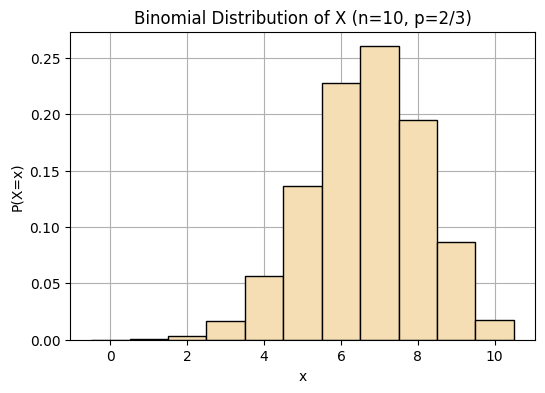

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

x = np.arange(0,11)
ax.bar(x, binom.pmf(x, 10, 2/3), width=1, color='wheat', edgecolor='k')
ax.set(axisbelow=True, title="Binomial Distribution of X (n=10, p=2/3)", xlabel='x', ylabel='P(X=x)')
ax.grid();

---
<h3 style="color: green; font-size: 16pt;">Binomial Sums</h3>

Frequently, we are interested in problems where it is necessary to find $P(X \le r)$ or $P(a \le X \le b)$. In such case, binomial sums as given by the formula below can be useful.

$$
P(X \le r) = B(r;\ n, p) = \sum^r_{x=0} b(x;\ n, p).
$$

Simply say, it is the cumulative distribution function of the binomial distribution. The value of binomial sums for various values of $n$ and $p$ are often shows in a table in textbooks or other documents for quick calculation. (For an example table, see [Binomial Distribution Table](https://www.statisticshowto.com/tables/binomial-distribution-table/))

<span style="color: green;"><b><u>Example</u></b></span> The probability that a patient recovers from a rare blood disease is 0.4. If 15 people
are known to have contracted this disease, what is the probability that (a) at least
10 survive, (b) from 3 to 8 survive, and (c) exactly 5 survive?

Let $X$ represent the number of patients recover from the disease, so the pmf of $X$ is

$$
b(x;\ 15, 0.4) = \binom{15}{x}(0.4)^x(0.6)^{15-x} 
$$

Refer to the following table:

<center><img src="https://newisreal1.github.io/Statistics-Notebooks/img/binom15.png" alt="range space mapping" width="40%"></center>

the answer to each question is

$$
\text{(a)}\quad P(X \ge 10) = 1 - P(X < 10) = 1 - \sum_{x=0}^{9} b(x;\ 15,0.4) = 1 - 0.9662 = 0.0338
$$

$$
\text{(b)}\quad P(3 \le X \le 8) = \sum_{x=3}^{8} b(x;\ 15,0.4) = \sum_{x=0}^{8} b(x;\ 15,0.4) - \sum_{x=0}^{2} b(x;\ 15,0.4) = 0.9050 - 0.0271 = 0.8779
$$

$$
\text{(c)}\quad P(X = 5) = b(5;\ 15,0.4) = \sum_{x=0}^{5} b(x;\ 15,0.4) - \sum_{x=0}^{4} b(x;\ 15,0.4) =  0.4032 - 0.2173 = 0.1859
$$

---
<h3 style="color: green; font-size: 16pt;">Expected Value & Variance of Binomial Distribution</h3>

Let's derive the formula for expected value and variance of a Bernoulli random variable.

Let the outcome on the j-th trial be represented by a Bernoulli random variable $I_j$ , which assumes the values $0$ and $1$ with probabilities $1-p$ and $p$, respectively. Therefore, in a binomial experiment the number of successes can be written as the sum of the $n$ independent indicator variables. Hence,

$$
X = I_1 + I_2 + \cdots + I_n
$$

The mean of any $I_j$ is obviously $p$ as shown by $E[I_j] = (0)(1-p) + (1)(p) = p$. So the expected value of $X$ is

$$
\begin{align*}
E[X] = E[I_1 + I_2 + \cdots + I_n] &= E[I_1] + E[i_2] + \cdots + E[I_n] \\ \\
&= \underbrace{p + p + \cdots + p}_{n \text{ terms}} = np
\end{align*}
$$

Now for the variance, consider the variance of $I_j$ given by

$$
\sigma_{I_j}^2 = E[(I_j - p)^2] = (0 - p)^2(1-p) + (1-p)^2p = p - p^2 = p(1-p)
$$

Since each trial is independent to the others, so

$$
\begin{align*}
\sigma_X^2 &= \sigma_{I_1}^2 + \sigma_{I_j}^2 + \cdots + \sigma_{I_n}^2 \\ \\
&= \underbrace{p(1-p) + p(1-p) + \cdots + p(1-p)}_{n \text{ terms}} = np(1-p)
\end{align*}
$$

In conclusion, the expected value of a Bernoulli random variable with binomial distribution $b(x;\ n,p)$ is $\mu = np$ and the variance is $\sigma^2 = np(1-p)$.

<span style="color: green;"><b><u>Example</u></b></span> From the previous example concerning about the probability of patients recovering from a rare blood disease where the random variable $X$ represents the number of recovered patients out of 15 patients, with probability distribution $b(x;\ 15,0.4)$. The expected value, variance, and standard deviation of the number of recovered patients are

$$
\mu = np = (15)(0.4) = 6,\quad \sigma^2 = np(p-1) = 6(0.6) = 3.6,\quad \text{ and }  \sigma = \sqrt{3.6} \approx 1.897
$$

<div style="widht:100%; height:20px; background-color:darkorchid;"></div>

## Multinomial Distribution (Optional)

We can generalize the concept of Bernoulli process to the experiment where each trial more than two possible outcomes. Such process is called a **multinomial experiment**. For examples, the classification of product as begin too light, too heavy, or acceptable and  the drawing of a card from a deck *with replacement* where the 4 suits are the outcomes are multinomial experiments.

---
<h3 style="color: green; font-size: 16pt;">Generalizing Combinations</h3>

The **binomial coefficient** or the **combination** $\binom{n}{k}$ is typically defined as the number of different ways one can select $k$ items from the set of $n$ distinct items such that the order of selection does not matter. The binomial coefficient can be calculated from the formula

$$
\binom{n}{k} = \frac{n!}{k!(n-k!)}
$$

More generally, a combination can also be thought of as *a selection of two sets of items*: those that go into the chosen bin and those that go into the unchosen bin. This can be generalized to any number of bins with the constraint that every item must go to exactly one bin. The number of ways to put objects into bins is given by the **multinomial coefficient**

$$
\binom{n}{x_1, x_2, \ldots, x_k} = \frac{n!}{x_1!x_2!\cdots x_k!}
$$

where $n$ is the number of items, $m$ is the number of bins, and $x_i$ is the number of items that go into bin $i$ with a constraint that $x_1 + x_2 + \cdots + x_k = n$.

So the binomial coefficient is the special case of multinomial coefficient where $k$ items go into the chosen bin and the remaining $n-k$ items go into the unchosen bin:

$$
\binom{n}{k} = \binom{n}{k,n-k} = \frac{n!}{k!(n-k)!}
$$

---
<h3 style="color: green; font-size: 16pt;">The Multinomial Distribution</h3>

> If a given trial can result in the $k$ outcomes $E_1, E_2,\ldots,E_k$ with probabilities
$p_1, p_2,\ldots,p_k$, then the probability distribution of the random variables $X_1, X_2,\ldots,X_k$, representing the number of occurrences for $E_1, E_2,\ldots,E_k$ in $n$ independent trials, is
> $$ P(X_1=x_1, X_2=x_2, \ldots, X_k=x_k) = f(x_1,x_2,\ldots,x_k;\ p_1,p_2,\ldots,p_k,n) = \binom{n}{x_1,x_2,\ldots,x_k} p_1^{x_1} p_2^{x_2} \cdots p_k^{x_k} $$
> with
> $$ \sum_{x=1}^{k} x_i = n \quad\text{and}\quad \sum_{x=1}^{k} p_i = 1. $$

<span style="color: green;"><b><u>Example</u></b></span> According to a genetics theory, a certain cross of
guinea pigs will result in red, black, and white offspring in the ratio 8:4:4. Find the probability that among 8 offspring, 5 will be red, 2 black, and 1 white.

Let $X_r, X_b,$ and $X_w$ represent the number of red, black, and white guinea pigs from 8 offsprings, from the given information, we have

$$
p_r = \frac{8}{16} = \frac{1}{2},\quad\text{and}\quad p_b = p_w = \frac{4}{16} = \frac{1}{4}.
$$

So the probability that among 8 offspring, 5 will be red, 2 black, and 1 white is

$$
\begin{align*}
f(x_r = 5, x_b = 2, x_w = 1;\ p_r = 0.5, p_b = 0.25, p_w = 0.25, n = 8) &= \binom{8}{5,2,1}(0.5)^5(0.25)^2(0.25)^1 \\
&= \frac{8!}{5!2!1!}(0.03125)(0.0625)(0.25) \\
&\approx 0.082 = 8.2\%
\end{align*}
$$

<div style="widht:100%; height:20px; background-color:darkorchid;"></div>

## Hypergeometric Distribution

The **hypergeometric distribution** is highly related to the binomial distribution. In the case of the binomial distribution, *independence among trials is required*. As a result, if that distribution is applied to, say, sampling from a lot of items (deck of cards, batch
of production items), the sampling must be done **with replacement** of each item after it is observed. On the other hand, the hypergeometric distribution *does not require independence* and is based on sampling done **without replacement**.

We can think of the binomial distribution as the approximate probability model for sampling without replacement from a finite dichotomous (sucess-failure) population provided the sample size $n$ is very small relative to the population size $N$ while the
hypergeometric distribution is the exact probability model for the number of successes in the sample.

The assumptions leading to the hypergeometric distribution are as follows:

1. The population or set to be sampled consists of $N$ individuals, objects, or elements (a *finite population*).
2. Each individual can be characterized as a *success* ($S$) or a *failure* ($F$), and there are $k$ successes ($N-k$ failures) in the population.
3. A sample of $n$ individuals is selected *without replacement* in such a way that each subset of size $n$ is equally likely to be chosen.

> The probability distribution of the **hypergeometric** random variable $X$ representing the number of successes in a random sample of size $n$ selected from $N$ items of which $k$ are labeled success and $N - k$ labeled failure, is
> $$ P(X = x) = h(x;\ N,n,k) = \frac{\binom{k}{x}\binom{N-k}{n-x}}{\binom{N}{n}}. $$
> for integer $x$ satisfying $\max(0, n-(N-k)) \le x \le \min(n,k).$

<span style="color: green;"><b><u>Example</u></b></span> Five individuals from an animal population thought to be near extinction in a certain region have been caught, tagged, and released to mix into the population. After they have had an opportunity to mix, a random sample of 10 of these animals
is selected. Let $X$ be the number of tagged animals in the second sample. If there are actually 25 animals of this type in the region, what is the probability that (a) $X=2$? and (b) $X \le 2$?

From the information $X$ is a hypergeometric rv (tagged = success, untagged = failure) with parameters $n = 10$ (number of sampled animals), $N = 25$ (size of population), and $k = 5$ (number of tagged animals), so

For question (a):

$$
P(X=2) = h(2;\ N=25,n=10,k=5) = \frac{\binom{5}{2}\binom{20}{8}}{\binom{25}{10}} = \frac{10 \cdot 125,970}{3,268,760} \approx 0.385
$$

For question (b):

$$
\begin{align*}
P(X\le2) = P(X=0) + P(X=1) + P(X=2) &= h(0;\ 25,10,5) + h(1;\ 25,10,5) + h(2;\ 25,10,5) \\
&= 0.057 + 0.257 + 0.385 = 0.699
\end{align*}
$$

<span style="color: green;"><b><u>Example</u></b></span> Lots of 40 components each are deemed unacceptable if they contain 3 or more defectives. The procedure for sampling a lot is to select 5 components at random and to reject the lot if a defective is found. What is the probability that exactly 1
defective is found in the sample if there are 3 defectives in the entire lot?

Let $X$ be the number of defective components found during the sampling, so $X$ is a hypergeometric rv with $n = 5$, $N = 40$, $k = 3$. Thus

$$
P(X=1) = h(1;\ N=40, n=5, k=3) = \frac{ \binom{3}{1} \binom{37}{4} }{ \binom{40}{5} } \approx 0.301
$$

We can see that this plan is not desirable since it detects a bad lot (3 defectives) only about 30% of the time.

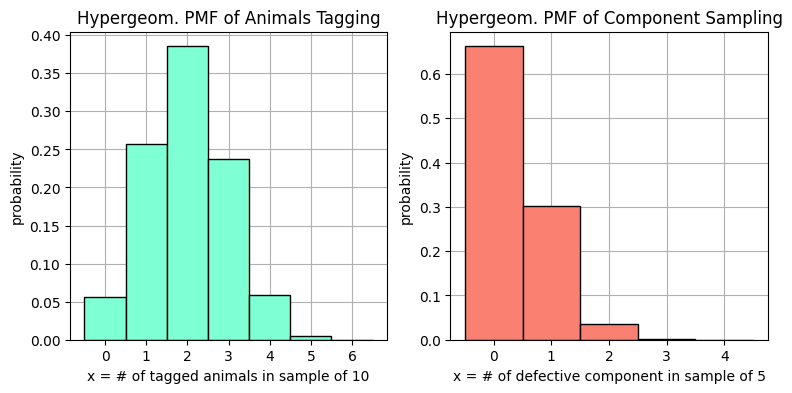

In [4]:
fig, axs = plt.subplots(1,2,figsize=(9,4))

X1 = np.arange(0,7)
X2 = np.arange(0,5)

axs[0].bar(X1, hypergeom.pmf(X1,25,10,5), width=1, edgecolor='k', color='aquamarine')
axs[1].bar(X2, hypergeom.pmf(X2,40,5,3), width=1, edgecolor='k', color='salmon')

axs[0].set(
    title='Hypergeom. PMF of Animals Tagging', 
    xlabel='x = # of tagged animals in sample of 10', ylabel = 'probability',
    axisbelow=True, xticks=X1
)
axs[1].set(
    title='Hypergeom. PMF of Component Sampling', 
    xlabel='x = # of defective component in sample of 5', ylabel = 'probability',
    axisbelow=True
)

for ax in axs:
    ax.grid()

---
<h3 style="color: green; font-size: 16pt;">Expected Value & Variance of Hypergeometric Distribution</h3>

> The mean and variance of the hypergeometric rv $X$ having pmf $h(x;\ N,n,k)$ are
> $$ \mu = E(X) = \frac{nk}{N} \quad\text{and}\quad \sigma^2 = \frac{N-n}{N-1} \cdot n \cdot \frac{k}{N}\left( 1 - \frac{k}{N} \right). $$

Notice that the ratio $k/N$ is the proportion of successes in the population, that is the probability of success denoted $p$ in the binomial distribution. Hence, for a hypergeometric distribution, we can write

$$
\mu = np \quad\text{and}\quad \sigma^2 = \frac{N-n}{N-1} \cdot np(1-p).
$$

We can see that the mean value of the binomial and hypergeometric rv's are equal, whereas the variance of the two rv's differ by the factor $(N-n)/(N-1)$ often called the **finite population correction factor**. We can also see that the factor is approximately equal to 1 when $N$ is much larger than $n$, so we can approximate a hypergeometric rv with binomial rv for a value $N$ that is much larger than $n$. 

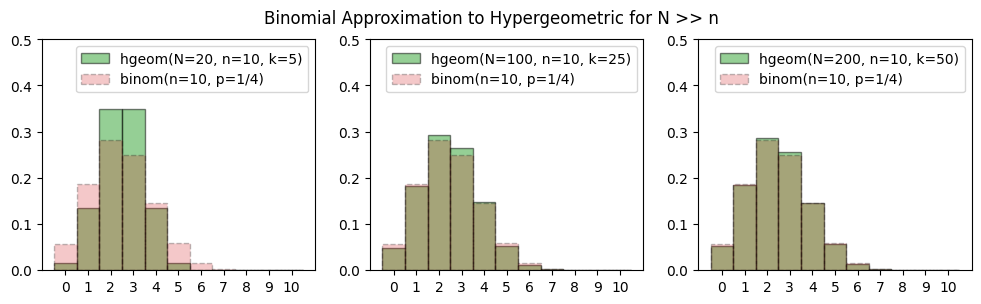

In [5]:
fig, axs = plt.subplots(1,3,figsize=(12,3))

fig.suptitle("Binomial Approximation to Hypergeometric for N >> n")

X1 = np.arange(0,11)

axs[0].bar(
    X1, hypergeom.pmf(X1,20,10,5),
    width=1, color='tab:green', edgecolor='k', alpha=0.5,
    label='hgeom(N=20, n=10, k=5)'
)
axs[0].bar(
    X1, binom.pmf(X1,10,1/4),
    width=1, color='tab:red', edgecolor='k', linestyle='dashed', alpha=0.25,
    label='binom(n=10, p=1/4)'
)

axs[1].bar(
    X1, hypergeom.pmf(X1,100,10,25),
    width=1, color='tab:green', edgecolor='k', alpha=0.5,
    label='hgeom(N=100, n=10, k=25)'
)
axs[1].bar(
    X1, binom.pmf(X1,10,1/4),
    width=1, color='tab:red', edgecolor='k', linestyle='dashed', alpha=0.25,
    label='binom(n=10, p=1/4)'
)

axs[2].bar(
    X1, hypergeom.pmf(X1,200,10,50),
    width=1, color='tab:green', edgecolor='k', alpha=0.5,
    label='hgeom(N=200, n=10, k=50)'
)
axs[2].bar(
    X1, binom.pmf(X1,10,1/4),
    width=1, color='tab:red', edgecolor='k', linestyle='dashed', alpha=0.25,
    label='binom(n=10, p=1/4)'
)

for ax in axs:
    ax.set(ylim=[0,0.5], xticks=X1)
    ax.legend()

<span style="color: green;"><b><u>Example</u></b></span> In the previous animals tagging example ($N=25, n=10, k=5$), the expected value and the variance of the number of tagged animals in a sample of 10 are

$$
\mu = \frac{(10)(5)}{25} = 2 \quad\text{and}\quad \sigma^2 = \frac{15}{24}(10)(0.2)(0.8) = 1
$$

Moreover, if the sampling was carried out with replacement (so $X$ is a binomial rv), then $\sigma^2 = (10)(0.2)(0.8) = 1.6$

<div style="widht:100%; height:20px; background-color:darkorchid;"></div>

## Negative Binomial Distribution & Geometric Distribution

The **negative binomial** rv and distribution are based on an experiment with the same properties listed for a binomial experiment, with the exception that the trials will be repeated until a *fixed* number of successes occur. Therefore, instead of the probability of $x$ successes
in $n$ trials, where $n$ is fixed, we are now interested in the probability that the $k$-th success occurs on the $x$-th trial. Experiments of this kind are called **negative binomial experiments** because it is somewhat the opposite of binomial experiment, instead of fixing the number of trials and randomize the number of successes, we now fix the number of successes and randomize the number of trials.

> If $X$ is the number of *trials* required to produce $k$ successes in a **negative binomial experiment**, then $X$ is called a **negative binomial random variable**

> If repeated independent trials can result in a success ($S$) with probability $p$ and a failure with probability $1 - p$, then the probability distribution of the negative binomial random variable $X$ representing the number of the trial on which the $k$-th success occurs, is a **negative binomial distribution** denoted by $nb(x;\ k,p)$ or $b^*(x;\ k,p)$ and given by
> $$ nb(x;\ k,p) = b^*(x;\ k,p) = \binom{x-1}{k-1}p^k(1-p)^{x-k} $$
> for $x = k, k+1, k+2, \ldots$

Another way to define a negative binomial random variable $X$ is to use $X$ to represent the number of failure ($F$) that precede the $k$-th success since the number of successes is fixed, the number of trials and the number of failures should have the same distribution. The formula for the pmf in this case can be derive by substitute the value of $x$ representing the number of trials in the above definition by $x+k$ so $x$ will be equal to the number of failures and $+k$ will take into account the number of successes: 

> If $X$ is a random variable representing the number of failure that precede the $k$-th success in a negative binomial experiment, then $X$ is a negative binomial random variable with pmf
> $$ b^*(x;\ k,p) = \binom{x+k-1}{k-1}p^k(1-p)^x $$
> for $x=0,1,2,\ldots$

<span style="color: green;"><b><u>Example</u></b></span> In an NBA championship series, the team that
wins four games out of seven is the winner. Suppose that teams A and B face each other in the championship games and that team A has probability 0.55 of winning a game over team B.

(a) What is the probability that team A will win the series in 6 games? <br>
(b) What is the probability that team A will win the series? <br>
(c) If teams A and B were facing each other in a regional playoff series, which is
decided by winning three out of five games, what is the probability that team
A would win the series?

We can see that the number of games that team A needed to play before the team win the championship $X$ is a negative binomial rv (with winning a game begin though as a success) with the distribution

$$
b^*(x;\ 4, 0.55) = \binom{x-1}{3}(0.55)^4(0.45)^{x-4} \quad\text{for } x = 4,5,6,\ldots
$$

So, the answer to each question is

(a) 
$$
P(X=6) = b^*(6;\ 4, 0.55) = \binom{5}{3}(0.55)^4(0.45)^2 = 0.1853.
$$

(b)
$$
\begin{align*}
P(\text{team A will win the championship}) &= P(\text{team A will win 4 games within 7 games}) \\ \\
&= b^*(4;\ 4,0.55) + b^*(5;\ 4,0.55) + b^*(6;\ 4,0.55) + b^*(7;\ 4,0.55) \\ \\
&= 0.0915 + 0.1647 + 0.1853 + 0.1668 = 0.6083.
\end{align*}
$$

(c)
$$
\begin{align*}
P(\text{team A will win the playoff series}) &= P(\text{team A will win 3 games within 5 games}) \\ \\
&= b^*(3;\ 3,0.55) + b^*(4;\ 3,0.55) + b^*(5;\ 3,0.55) \\ \\
&= 0.1664 + 0.2246 + 0.2021 = 0.5931.
\end{align*}
$$

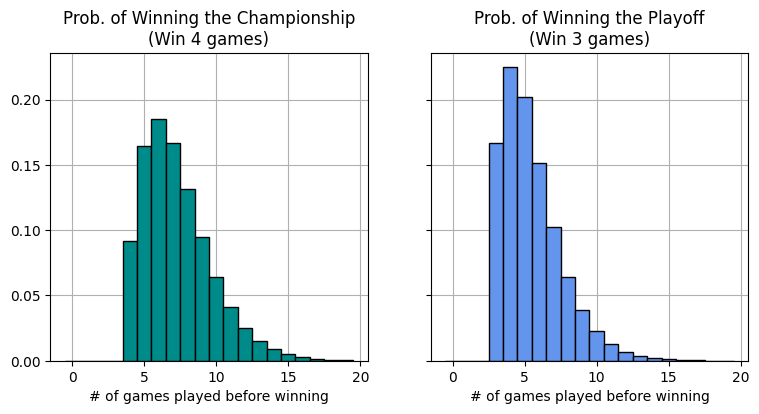

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(9,4), sharey=True)

X = np.arange(0,20)

axs[0].bar(
    X, nbinom.pmf(X-4, 4, 0.55), width=1,
    color='darkcyan', edgecolor='k'
)
axs[0].set(title="Prob. of Winning the Championship\n(Win 4 games)", xlabel="# of games played before winning")

axs[1].bar(
    X, nbinom.pmf(X-3, 3, 0.55), width=1,
    color='cornflowerblue', edgecolor='k'
)
axs[1].set(title="Prob. of Winning the Playoff\n(Win 3 games)", xlabel="# of games played before winning")

for ax in axs:
    ax.set(axisbelow=True)
    ax.grid()

---
<h3 style="color: green; font-size: 16pt;">Expected Value & Variance of Negative Binomial Distribution</h3>

> If $X$ is a negative binomial rv that counting the number of trials needed to see $k$ success with pmf $b^*(x;\ k, p)$, then
> $$ \mu = E(X) = \frac{k}{p} \quad\text{and}\quad \sigma^2 = \frac{k(1-p)}{p^2}. $$
> If $X$ is counting the number of failures before $k$-th success, then
> $$ \mu = E(X) = \frac{k(1-p)}{p} $$
> and the variance remains the same.

---
<h3 style="color: green; font-size: 16pt;">Geometric Distribution</h3>

If we consider the special case of the negative binomial distribution where $k = 1$, we have a probability distribution for the number of
trials required for *a single success*. An example would be the tossing of a coin until a head occurs. We might be interested in the probability that the first head occurs on the fourth toss. The negative binomial distribution reduces to the form

$$
b^*(x;\ 1,p) = \binom{x - 1}{0}p^1(1-p)^{x-1} = p(1-p)^{x-1}, \quad x = 1,2,3,\ldots
$$

Since the successive terms constitute a geometric progression, it is customary to refer to this special case as the **geometric distribution**.

> If repeated independent trials can result in a success with probability $p$ and a failure with probability $1 - p$, then the probability distribution of the random variable $X$ representing the number of the trial on which the first success occurs, is
> $$ b^*(x;\ 1,p) = g(x;\ p) = p(1-p)^{x-1} \quad\text{for } x = 1,2,3,\ldots $$

<span style="color: green;"><b><u>Example</u></b></span> For a certain manufacturing process, it is known that, on the average, 1 in every
100 items is defective. What is the probability that the fifth item inspected is the first defective item found?

Using the geometric distribution with $x = 5$ and $p = 0.01$, we have

$$
P(X = 5) = g(5;\ 0.01) = (0.01)(0.99)^4 = 0.0096.
$$

Moreover, if we look at the expected value and variance of this rv, we see that

$$
\mu = \frac{1}{0.01} = 100 \quad\text{and}\quad \sigma^2 = \frac{1(0.99)}{0.01^2} = 9,900
$$

we can see that the variance $\sigma^2 = 9,900$ yields the standard deviation $\sigma \approx 99.5$ which is pretty large. If we apply the Chebyshev's theorem to find the interval for which we can at least be 90% certain that we will find a defective item, we get

$$
1 - \frac{1}{k^2} = 0.9 \iff k \approx 3.16
$$

that is

$$
\begin{align*}
P(\mu - 3.16\sigma < X < \mu + 3.16\sigma) &= P(214.42 < X < 414.42) \\
&= P(0 < X < 414) \\
&\ge 0.9
\end{align*}
$$

Therefore, by Chebyshev's theorem, to be *at least* 90% confident that a defective item will be found, we have to test (on average) around 414 items. 

<div style="widht:100%; height:20px; background-color:darkorchid;"></div>

## Poisson Distribution

Experiments yielding numerical values of a random variable $X$ representing the number of outcomes occurring during a given *time interval* or in a *specified region*, are called **Poisson experiments**.

The given time interval may be of any length, such as a minute, a day, a week, a month, or even a year. For example, a Poisson experiment
can generate observations for the random variable $X$ representing 

- the number of telephone calls received per hour by an office,
- the number of days school is closed due to snow during the winter,
- the number of games postponed due to rain during a baseball season.
  
The specified region could be a line segment, an area, a volume, or perhaps a piece of material. In such instances, $X$ might represent

- the number of field mice per acre,
- the number of bacteria in a given culture,
- the number of typing errors per page.

---
<h3 style="color: green; font-size: 16pt;">The Poisson Process and Its Properties</h3>

A Poisson experiment is derived from the Poisson process and possesses the following properties.

1. The number of outcomes occurring in one time interval or specified region of space is *independent* of the number that occur in any other disjoint time interval or region. In this sense we say that **the Poisson process has no memory**.
   
2. The probability that a single outcome will occur during a very short time interval or in a small region is *proportional to the length of the time interval or the size of the region* and does not depend on the number of outcomes occurring outside this time interval or region.

   
3. The probability that more than one outcome will occur in such a short time interval or fall in such a small region is negligible.


The number $X$ of outcomes occurring during a Poisson experiment is called a **Poisson random variable**, and its probability distribution is called the **Poisson distribution**.

---

<h3 style="color: green; font-size: 16pt;">The Poisson Distribution, Mean, and Variance</h3>

> The probability distribution of the **Poisson random variable** $X$, representing the number of outcomes occurring in a given time interval or specified region denoted by $t$, is
> $$ p(x;\ \lambda t) = \frac{e^{-\lambda t}(\lambda t)^x}{x!} \quad\text{for } x = 0,1,2,\ldots  $$
> where $\lambda$ is the average average number of outcomes per unit time, length, area, or volume, so $\lambda t$ is the average number of outcomes. Thus, we can also write the pmf as
> $$ p(x;\ \mu) = \frac{e^{-\mu}\mu^x}{x!}. $$
> where $\mu$ is the expected value of $X$.

> **Both the mean and the variance** of the Poisson distribution $p(x;\ \lambda t)$ are $\lambda t$. 

<span style="color: green;"><b><u>Example</u></b></span> During a laboratory experiment, the average number of radioactive particles passing through a counter in 1 millisecond is 4. What is the probability that 6 particles enter the counter in a given millisecond?

Using the Poisson distribution with $x = 6$ and $\lambda t = 4$, we have

$$
P(X = 6) = p(6;\ 4) = \frac{e^{-4} \cdot 4^6}{6!} \approx 0.1042.
$$

<span style="color: green;"><b><u>Example</u></b></span> Let $X$ denote the number of creatures of a particular type captured in a trap during a
given time period. Suppose that $X$ has a Poisson distribution with $\mu = 4.5$, so on average traps will contain $4.5$ creatures.

The probability that a trap contains exactly five creatures is

$$
P(X = 5) = p(5;\ 4.5) = \frac{e^{-4.5} (4.5)^5}{5!} \approx 0.1708
$$

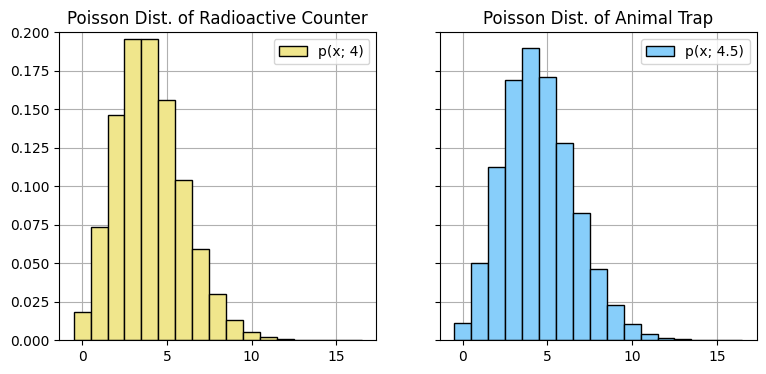

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(9,4), sharey=True)

X = np.arange(0,17)

axs[0].bar(
    X, poisson.pmf(X, 4), width=1,
    color='khaki', edgecolor='k',
    label="p(x; 4)"
)
axs[0].set_title("Poisson Dist. of Radioactive Counter")

axs[1].bar(
    X, poisson.pmf(X, 4.5), width=1,
    color='lightskyblue', edgecolor='k',
    label="p(x; 4.5)"
)
axs[1].set_title("Poisson Dist. of Animal Trap")

for ax in axs:
    ax.set(ylim=[0,0.2], axisbelow=True)
    ax.grid(); ax.legend()

---

<h3 style="color: green; font-size: 16pt;">Approximation of Binomial Distribution by a Poisson Distribution</h3>

Although the Poisson usually finds applications in space and time problems, it can be viewed as a limiting form of the binomial distribution. In
the case of the binomial, if $n$ is quite large and $p$ is small, the conditions begin to simulate the continuous space or time implications of the Poisson process.

> Suppose that in the binomial pmf $b(x;\ n, p)$, we let $n \to \infty$ and $p \to 0$ in such a way that $np$ approaches a value $\mu > 0$ . Then
> $$ b(x;\ n, p) \to p(x;\ \mu) $$

As a rule of thumb, if $n > 50$ and $np = \mu < 5$ (or significantly lower than $n$), we can safely applied the approximation $b(x;\ n,p) \approx p(x;\ \mu)$.

<span style="color: green;"><b><u>Example</u></b></span> In a certain industrial facility, accidents occur infrequently. It is known that the
probability of an accident on any given day is 0.005 and accidents are independent of each other.

(a) What is the probability that in any given period of 400 days there will be an accident on one day?

We can simply just calculate the probability using the binomial distribution

$$
b(1;\ 400, 0.005) = \binom{400}{1}(0.005)^1(0.995)^{400-1} \approx 0.270669.
$$

We can see that the calculation required us to evaluate a very large number such as $(0.995)^{399}$, this can be tedious without a powerful software. Instead we can use a Poisson distribution to approximate the result

$$
p(1;\ np) = p(1;\ 2) = \frac{e^{-2}2^1}{1!} = 2e^{-2} \approx 0.270670.
$$

(b) What is the probability that there are at most three days with an accident?

$$
P(X \le 3) = \sum_{x=0}^{3} p(x;\ 2) = \sum_{x=0}^{3} \frac{e^{-2}2^x}{x!} = 0.857
$$

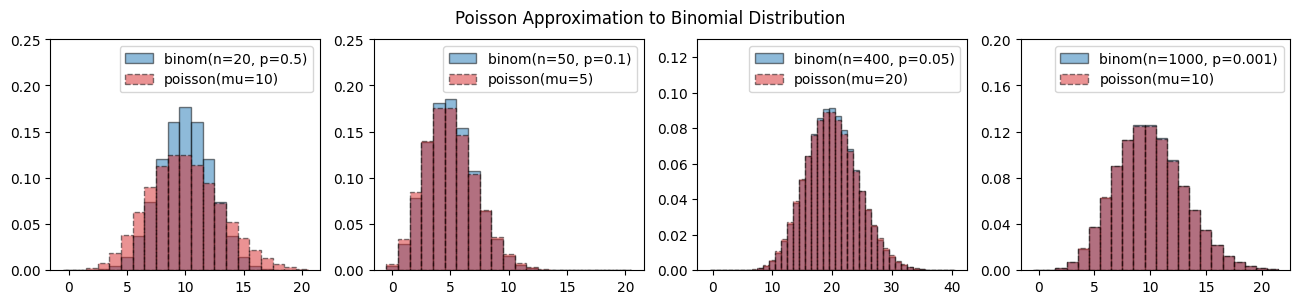

In [8]:
fig, axs = plt.subplots(1,4,figsize=(16,3))

fig.suptitle("Poisson Approximation to Binomial Distribution")

X1 = np.arange(0,21)

axs[0].bar(
    X1, binom.pmf(X1, 20, 0.5),
    width=1, color='tab:blue', edgecolor='k', alpha=0.5,
    label='binom(n=20, p=0.5)'
)
axs[0].bar(
    X1, poisson.pmf(X1, 20 * 0.5),
    width=1, color='tab:red', edgecolor='k', linestyle='dashed', alpha=0.5,
    label='poisson(mu=10)'
)

X1 = np.arange(0,21)

axs[1].bar(
    X1, binom.pmf(X1, 50, 0.1),
    width=1, color='tab:blue', edgecolor='k', alpha=0.5,
    label='binom(n=50, p=0.1)'
)
axs[1].bar(
    X1, poisson.pmf(X1, 50 * 0.1),
    width=1, color='tab:red', edgecolor='k', linestyle='dashed', alpha=0.5,
    label='poisson(mu=5)'
)

X1 = np.arange(0,41)

axs[2].bar(
    X1, binom.pmf(X1, 400, 0.05),
    width=1, color='tab:blue', edgecolor='k', alpha=0.5,
    label='binom(n=400, p=0.05)'
)
axs[2].bar(
    X1, poisson.pmf(X1, 400*0.05),
    width=1, color='tab:red', edgecolor='k', linestyle='dashed', alpha=0.5,
    label='poisson(mu=20)'
)

X1 = np.arange(0,22)

axs[3].bar(
    X1, binom.pmf(X1, 1000, 0.01),
    width=1, color='tab:blue', edgecolor='k', alpha=0.5,
    label='binom(n=1000, p=0.001)'
)
axs[3].bar(
    X1, poisson.pmf(X1, 1000*0.01),
    width=1, color='tab:red', edgecolor='k', linestyle='dashed', alpha=0.5,
    label='poisson(mu=10)'
)

for ax in axs:
    ax.set(ylim=[0,0.25])
    ax.legend()

axs[2].set(ylim=[0,0.13]);
axs[3].set(ylim=[0,0.2], yticks=np.linspace(0,0.2,6));

<div style="widht:100%; height:20px; background-color:darkorchid;"></div>